# AI@Penn Venture Fellows Spring 2021 Data Challenge

## Instructions
As a part of your application to the AI@Penn Venture Fellows program, you are required to complete a data challenge. The data challenge is designed to understand your thought process when working with a data/ML oriented problem. You are given data on listings from Airbnb (found here: https://www.kaggle.com/kritikseth/us-airbnb-open-data) and your task is to create a 3-5 page presentation (to be submitted as a PDF) outlining your findings, analysis, and any recommendations. 
The topic and structure of your analysis is fully up to you. Potential areas for investigation are as follows: 
1. Build a model to predict the price of an Airbnb listing 
a. How accurate is your model? What characteristics drive a higher price? 
2. Give a deeper insight into Airbnb listings 
a. Exploratory analysis to understand the mix and characteristics of Airbnb listings 

Once you have completed the challenge, please submit your code and presentation on the application form. This challenge is due along with the application on 12th February 2021.



## Introduction

With the given instructions, I will be working toward a mix of suggested areas of investigation 1 & 2, where I will attempt to identify features which have a stronger influence on Price than others (using some exploratory analysis), and use these features to build a model to predict price. Lastly I will look at my model's accuracy and write a brief summary

### **1. Importing Libraries and loading the dataset:**
+ I'm also on a kaggle notebook which comes with infrastructure to directly load datasets in from within kaggle.


In [81]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import folium

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/us-airbnb-open-data/AB_US_2020.csv


In [82]:
data = pd.read_csv('../input/us-airbnb-open-data/AB_US_2020.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 2. Taking a basic view of the data
At face value, we have a number of columns, both containing certain features as well as identifiers (host id, name, etc). Since we are attempting to identify features that correlate with price, I am just going to remove all these identifies but one -- we'll keep id to mark rows as distinct, but we dont need much more (host id/ host name/ name) beyond that

In [83]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [84]:
data.drop(columns = ['host_id', 'host_name', 'name'])


,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,NaN,28804,35.651460,-82.627920,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,NaN,28801,35.597790,-82.555400,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,NaN,28801,35.606700,-82.555630,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,NaN,28806,35.578640,-82.595780,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,NaN,28801,35.614420,-82.541270,Private room,125,30,58,19/10/15,0.52,1,0,Asheville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226025,45506143,NaN,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.903880,-77.029730,Entire home/apt,104,1,0,NaN,NaN,2,99,Washington D.C.
226026,45511428,NaN,"Brookland, Brentwood, Langdon",38.920820,-76.990980,Entire home/apt,151,2,0,NaN,NaN,1,300,Washington D.C.
226027,45514685,NaN,"Shaw, Logan Circle",38.911170,-77.033540,Entire home/apt,240,2,0,NaN,NaN,1,173,Washington D.C.
226028,45516412,NaN,"Kalorama Heights, Adams Morgan, Lanier Heights",38.926630,-77.044360,Entire home/apt,60,21,0,NaN,NaN,5,362,Washington D.C.


### 3. Separating features based on type

For the purposes of being more systematic, we'll break up our features into sets of numerical features and categorical ones, and look at them differently

In [85]:
categorical_data = data[['id', 'neighbourhood_group', 'room_type', 'city', 'price']]
numerical_data = data[['id', 'latitude', 'longitude', 'neighbourhood',  'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month'\
                       , 'calculated_host_listings_count', 'availability_365', 'price']]

### 4. Categorical Features

Lets look at our categorical features! We'll be working with them first, since they are significantly smaller in terms of the number of features

In [86]:
categorical_data.head()

,id,neighbourhood_group,room_type,city,price
0,38585,NaN,Private room,Asheville,60
1,80905,NaN,Entire home/apt,Asheville,470
2,108061,NaN,Entire home/apt,Asheville,75
3,155305,NaN,Entire home/apt,Asheville,90
4,160594,NaN,Private room,Asheville,125


#### 4.1 Room Type

Let's start with room types, since that seems simple. At an intuitive level, this should defeinitely have a reasonable impact on price, especially since the type of room has large effects on other factors, such as space, comfort, etc. 

In the next few cells, I will do the following:

+ See if this column contains any null values, and deal with those if necessary.
+ Group the data by room_type based on their average price per type
+ Visualize this relationship with a simple bar chart (here I will note that skyblue is one of the best colors in plt although no one asked)

In [87]:
categorical_data['room_type'].isnull().sum()

0

In [88]:
room_type_ave = categorical_data.groupby('room_type', as_index=False).mean()[['room_type', 'price']]
room_type_ave

,room_type,price
0,Entire home/apt,271.004917
1,Hotel room,281.096342
2,Private room,106.807003
3,Shared room,73.984860


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Price based on Room Type')

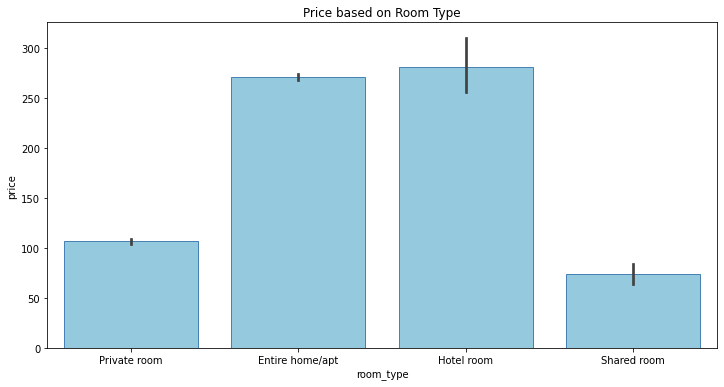

In [89]:
plt.figure(figsize=(12,6))
sns.barplot('room_type', 'price', data=categorical_data, color='skyblue', edgecolor='steelblue')
plt.title('Price based on Room Type')

We can clearly see here, as predicted, that the type of room seems to have an effect on the price of that room.

#### 4.2 City

Now lets see if the city has a noticeable effect on price. But before that, lets identify how dense the number of entries per city are. Then we can visualize both of these relationships

<AxesSubplot:xlabel='city', ylabel='Price'>

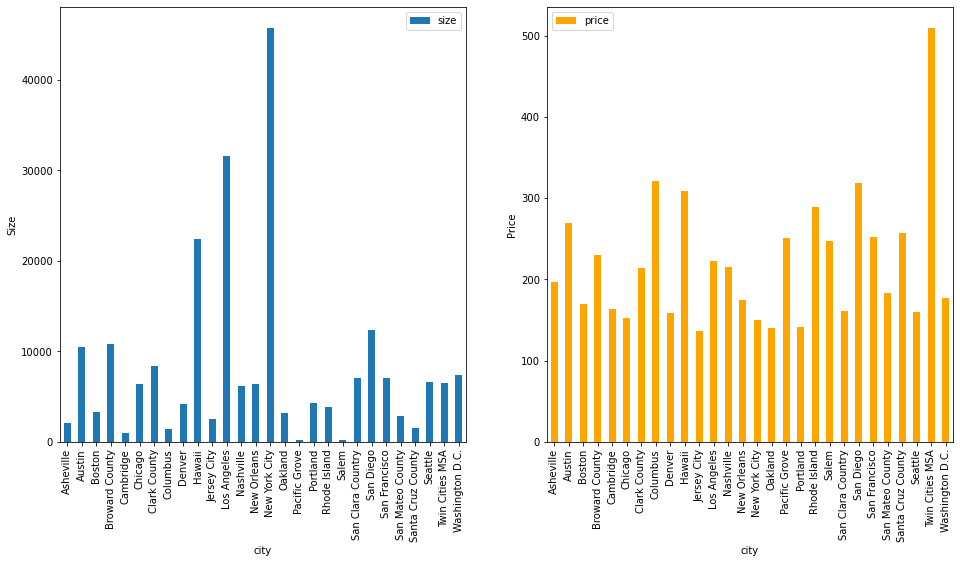

In [90]:
a,b = plt.subplots(1,2, figsize=(16,8))
city_count = categorical_data.groupby('city', as_index=False).size()
city_count.plot.bar(x='city', y='size', ax=b[0], ylabel='Size')
city_ave = categorical_data.groupby('city', as_index=False).mean()[['city', 'price']]
city_ave.plot.bar(x='city', y='price', ax=b[1], color='orange', ylabel='Price')

#### 4.3 Neighbourhood Group

Honestly this feature is pretty similar to the city of the listings, but it seems from a first view of the data that this column will present a problem in terms of null entries. So let's test this theory out

In [91]:
categorical_data['neighbourhood_group'].isnull().sum() / len(categorical_data['neighbourhood_group'])

0.5125204618855904

And well we are right here, because it turns out that over half the entries in our dataset don't contain a value for 'neighbourhood group'. We can look at the relationship it shares with price, but because of its similarity to the city feature (they both represent some facet of location albeit a city is larger), we will likely use the cities of listings over neighbourhood groups in our model since it contains more values to train our model


<AxesSubplot:>

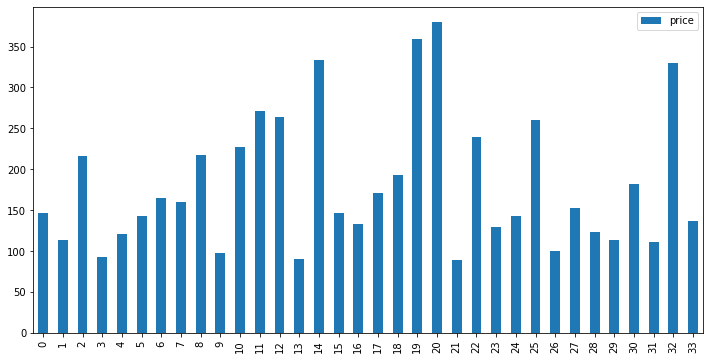

In [92]:
#dropping null values
neighbourhood_group_dropna = categorical_data.dropna(subset=['neighbourhood_group']).\
groupby('neighbourhood_group', as_index=False).mean()[['neighbourhood_group', 'price']]
neighbourhood_group_dropna.plot(kind='bar', figsize=(12,6))

## 5. Numerical Features

Lets begin off the bat by using a correlation matrix, to see at first glance if there are any strong relationships between numeric features and price

In [93]:
numerical_data.head()

,id,latitude,longitude,neighbourhood,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,38585,35.65146,-82.62792,28804,1,138,16/02/20,1.14,1,0,60
1,80905,35.59779,-82.55540,28801,1,114,07/09/20,1.03,11,288,470
2,108061,35.60670,-82.55563,28801,30,89,30/11/19,0.81,2,298,75
3,155305,35.57864,-82.59578,28806,1,267,22/09/20,2.39,5,0,90
4,160594,35.61442,-82.54127,28801,30,58,19/10/15,0.52,1,0,125


In [94]:
numerical_data.describe()

,id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,2.260300e+05,226030.000000,226030.000000,2.260300e+05,226030.000000,177428.00000,226030.000000,226030.000000,226030.000000
mean,2.547176e+07,35.662829,-103.220662,4.525490e+02,34.506530,1.43145,16.698562,159.314856,219.716529
std,1.317814e+07,6.849855,26.222091,2.103376e+05,63.602914,1.68321,51.068966,140.179628,570.353609
min,1.090000e+02,18.920990,-159.714900,1.000000e+00,0.000000,0.01000,1.000000,0.000000,0.000000
25%,1.515890e+07,32.761783,-118.598115,1.000000e+00,1.000000,0.23000,1.000000,0.000000,75.000000
50%,2.590916e+07,37.261125,-97.817200,2.000000e+00,8.000000,0.81000,2.000000,140.000000,121.000000
75%,3.772624e+07,40.724038,-76.919322,7.000000e+00,39.000000,2.06000,6.000000,311.000000,201.000000
max,4.556085e+07,47.734620,-70.995950,1.000000e+08,966.000000,44.06000,593.000000,365.000000,24999.000000


<AxesSubplot:>

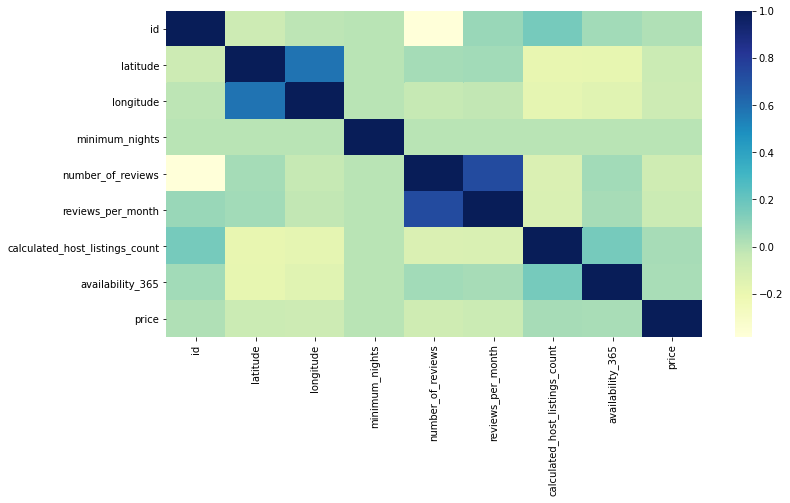

In [95]:
plt.figure(figsize=(12,6))
sns.heatmap(numerical_data.corr(),cmap='YlGnBu')


It doesn't seem that there are any features that stick out immediately in terms of their relationship with price, which is fine. We will look at these factors individually anyway

#### 5.1 Minimum Nights
Let's start by looking at minimum nights. Lets first look at the spread of the data. Then, I'll group up values of the min nights column into 10 bins, to make visualization easier

<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

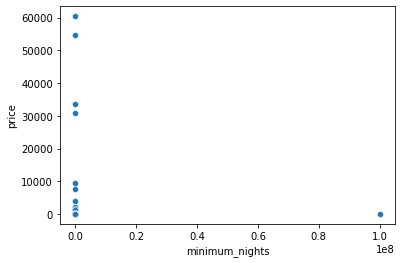

In [96]:
min_nights_spread=numerical_data.groupby('minimum_nights', as_index = False).count()[['minimum_nights', 'price']]
sns.scatterplot(x = 'minimum_nights', y='price', data=min_nights_spread)

In [97]:
#removing outlier 
drop_set = numerical_data[numerical_data['minimum_nights'] > 10**7]
numerical_data = numerical_data.drop(drop_set.index)

In [98]:
min_nights_ave_count = numerical_data.groupby('minimum_nights', as_index = False).count()
min_nights_ave = numerical_data.groupby('minimum_nights', as_index = False).mean()
numerical_data['min_nights_ave_bins']= pd.qcut(min_nights_ave['minimum_nights'], q=10, precision=6)
numerical_data['min_nights_ave_bins'] = numerical_data['min_nights_ave_bins'].apply(lambda x: pd.Interval(left=int(round(x.left)), right=int(round(x.right))))
numerical_data

#numerical_data.groupby('min_nights_ave_bins', as_index=False).mean()

,id,latitude,longitude,neighbourhood,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price,min_nights_ave_bins
0,38585,35.651460,-82.627920,28804,1,138,16/02/20,1.14,1,0,60,"(1.0, 18.0]"
1,80905,35.597790,-82.555400,28801,1,114,07/09/20,1.03,11,288,470,"(1.0, 18.0]"
2,108061,35.606700,-82.555630,28801,30,89,30/11/19,0.81,2,298,75,"(1.0, 18.0]"
3,155305,35.578640,-82.595780,28806,1,267,22/09/20,2.39,5,0,90,"(1.0, 18.0]"
4,160594,35.614420,-82.541270,28801,30,58,19/10/15,0.52,1,0,125,"(1.0, 18.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
226025,45506143,38.903880,-77.029730,"Downtown, Chinatown, Penn Quarters, Mount Vern...",1,0,NaN,NaN,2,99,104,NaN
226026,45511428,38.920820,-76.990980,"Brookland, Brentwood, Langdon",2,0,NaN,NaN,1,300,151,NaN
226027,45514685,38.911170,-77.033540,"Shaw, Logan Circle",2,0,NaN,NaN,1,173,240,NaN
226028,45516412,38.926630,-77.044360,"Kalorama Heights, Adams Morgan, Lanier Heights",21,0,NaN,NaN,5,362,60,NaN


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Minimum Nights')

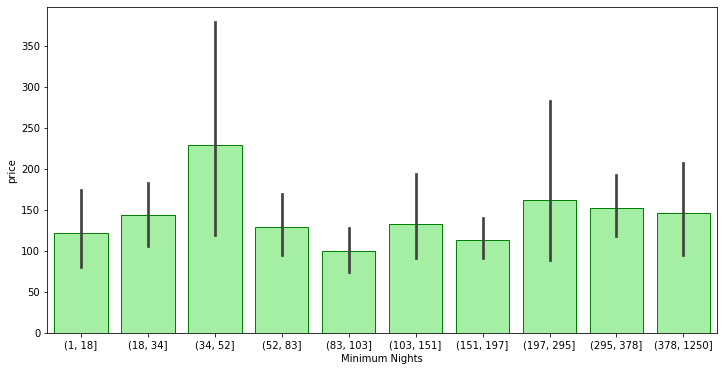

In [99]:
plt.figure(figsize=(12,6))
ax = sns.barplot('min_nights_ave_bins', 'price', data=numerical_data, color='palegreen', edgecolor='green')
#ax.set_xticklabels(['<18','<35','<52','<83','<104','<153', '<200','<300','<396','<100000000'])
ax.set_xlabel('Minimum Nights')

There does not seem to be a noticeable trend/ relationship in the data, but we can see that rooms which have minimum nights between ~30 and ~50 days have a higher price on average.


#### 5.2 Latitude/Longitude (and neighbourhood)

Lets look at how location in terms of latitudes/longitudes affects price. Then we will look at how neighbourhoods compare to latitudes/longitudes in terms of their relationship with price

In [120]:

from sklearn.cluster import KMeans

km = KMeans().fit(numerical_data[['latitude', 'longitude']])
km.cluster_centers_

our_map = folium.Map([42, -110], zoom_start=4)

for i in range(km.cluster_centers_.shape[0]):
    total = sum(km.labels_ == i)
    folium.CircleMarker([km.cluster_centers_[i,0], km.cluster_centers_[i,1]], \
                        popup = '('+ str(round(km.cluster_centers_[i,0])) + ', ' + str(round(km.cluster_centers_[i,1])) +') : ' +\
                        str(total) + ' listings here', radius = 15, fill_color='blue').add_to(our_map)

our_map

We can definitely see discernible clusters of listings from our data through this visualization.

#### 5.3 Reviews Per Month
How do revies per month affect the average price?

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='reviews_per_month', ylabel='price'>

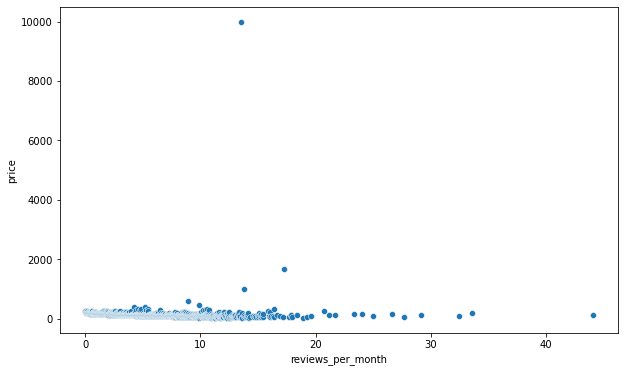

In [121]:
plt.figure(figsize=(10,6))
reviews_per_m = numerical_data.groupby('reviews_per_month', as_index=False).mean()[['reviews_per_month', 'price']]
sns.scatterplot('reviews_per_month', 'price', data=reviews_per_m)

There also doesn't seem to be any discernible relationship between the number of reviews per month, and price.

#### 5.4 Number of Reviews
Now that we've seen the average number of views per month, we'll look at the total number of reviews next.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

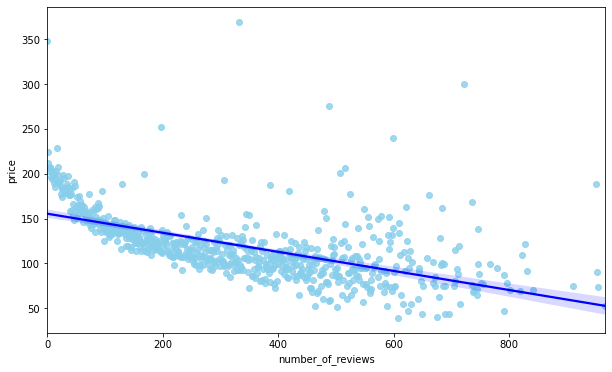

In [122]:
plt.figure(figsize=(10,6))
reviews_total = numerical_data.groupby('number_of_reviews', as_index=False).mean()
sns.regplot('number_of_reviews', 'price', data=reviews_total, color='skyblue', line_kws={"color": "blue"})

There seems to be a general negative correlation between the total number of reviews and price! It is unclear which factor is at the cause here, or whether neither of them are. We'll keep this feature.

#### 5.5 Availability
Next, we'll look at availability

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='availability_365', ylabel='price'>

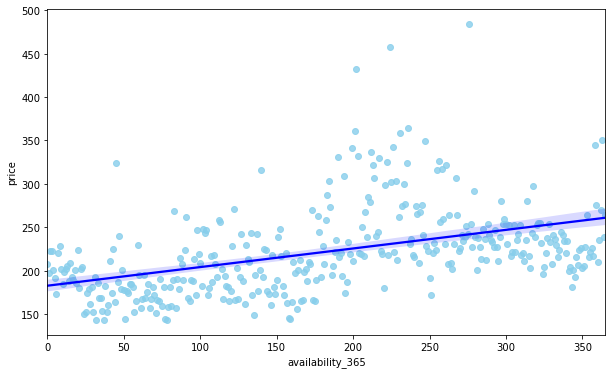

In [123]:
plt.figure(figsize=(10,6))
availability = numerical_data.groupby('availability_365', as_index=False).mean()
sns.regplot('availability_365', 'price', data=availability, color='skyblue', line_kws={"color": "blue"})


We seem to have received a positive correlation here, which is the flip of our earlier feature. A larger availability seems to relate to a higher price. We will definitely keep this feature

#### 5.6 Calculated Host Listings Count 
Our final feature

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='price'>

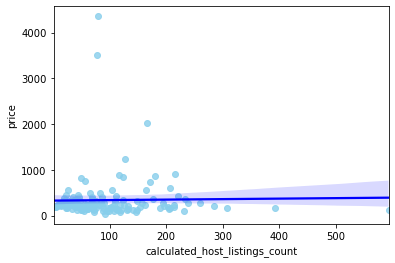

In [124]:
calc_host_listings = numerical_data.groupby('calculated_host_listings_count', as_index=False).mean()
sns.regplot('calculated_host_listings_count', 'price', data=calc_host_listings, color='skyblue', line_kws={"color": "blue"})


There doesnt seem to be a noticeable relationship here, and for that reason we'll leave this feature out.

### 6. Building a model

I'll be using A Linear Regression Model for this. In the following cells:
+ Split the data into train/test
+ Encode Categorical Data
+ Fit the data on a Linear Regressor 
+ Predict y_test values
+ Calculate the accuracy of the model

In [145]:
features = data[['room_type', 'minimum_nights', 'number_of_reviews', 'city', 'availability_365', 'latitude', 'longitude']]
y = data[['price']]

In [152]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [147]:
l = LabelEncoder()
features['room_type_enc'] = l.fit_transform(features['room_type'])
features['city_enc'] = l.fit_transform(features['city'])
features = features.drop(columns=['city', 'room_type'])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [148]:
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size = 0.4, 
                                                    random_state = 2)


In [153]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [154]:
y_pred = regressor.predict(x_test)

In [155]:
act_v_pred = pd.DataFrame(y_test).reset_index()
act_v_pred['Predicted'] = y_pred
act_v_pred.head(10)

,index,price,Predicted
0,25754,165,263.023627
1,192832,55,167.624471
2,201600,450,310.711147
3,120477,122,288.339603
4,76222,95,148.257587
5,35171,150,105.943939
6,82949,63,207.783241
7,147448,95,110.855529
8,98540,90,302.128816
9,172335,234,239.305420


In [156]:
mean_squared_error(y_pred, y_test, squared=False)

580.3470787613278

# Conclusion

My predicted results were definitely poor when compared to actual price values. However, I still did learn a tramendous amount throughout this Data Challenge, and am definitely more excited about this field as well as my application for AI@Penn's Veture Fellows--in the hopes of learning more! I have included a larger reflection in the final section of my presentation.

Thank you for your time!